Perceptron parent version batch

[1 2 1]
1
[ 0.5 -0.7  0.2]
[ 1  0 -1]
1
[ 0.5 -0.7  0.2]
[ 1 -2  1]
0
[ 0.5 -0.7  0.2]
[1 0 2]
0
[ 0.5 -0.7  0.2]
[1 2 1]
1
[ 0.4 -0.3  0. ]
[ 1  0 -1]
1
[ 0.4 -0.3  0. ]
[ 1 -2  1]
0
[ 0.4 -0.3  0. ]
[1 0 2]
0
[ 0.4 -0.3  0. ]
[1 2 1]
1
[ 0.3  0.1 -0.2]
[ 1  0 -1]
1
[ 0.3  0.1 -0.2]
[ 1 -2  1]
0
[ 0.3  0.1 -0.2]
[1 0 2]
0
[ 0.3  0.1 -0.2]
[ 0.3  0.1 -0.2]
[0.30000000000000004, 0.10000000000000009, -0.2]
[1 2 1]
1
[ 0.5 -0.7  0.2]
[ 1  0 -1]
1
[ 0.5 -0.7  0.2]
[ 1 -2  1]
0
[ 0.5 -0.7  0.2]
[1 0 2]
0
[ 0.5 -0.7  0.2]
[1 2 1]
1
[ 0.4 -0.3  0. ]
[ 1  0 -1]
1
[ 0.4 -0.3  0. ]
[ 1 -2  1]
0
[ 0.4 -0.3  0. ]
[1 0 2]
0
[ 0.4 -0.3  0. ]
[1 2 1]
1
[ 0.3  0.1 -0.2]
[ 1  0 -1]
1
[ 0.3  0.1 -0.2]
[ 1 -2  1]
0
[ 0.3  0.1 -0.2]
[1 0 2]
0
[ 0.3  0.1 -0.2]
[ 0.3  0.1 -0.2]
(0.10000000000000009, 0) (0, -0.2)


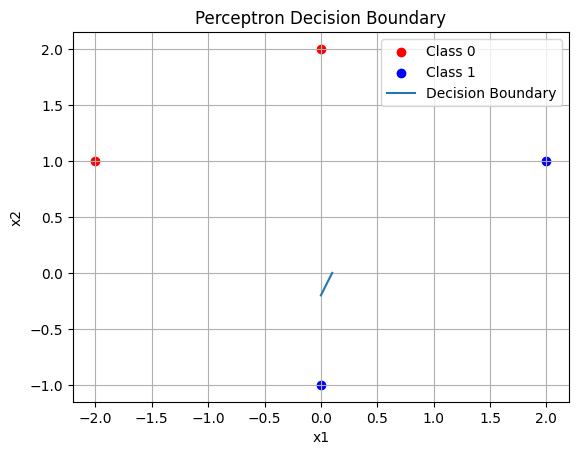

In [58]:
import numpy as np

def perceptron_batch(points, labels, weights, alpha):
    """
    Implement a perceptron using the batch update rule.
    
    :param points: List of two-dimensional points.
    :param labels: List of labels corresponding to the points.
    :param weights: Initial weights as a list [w0, w1, w2].
    :param alpha: Learning rate.
    :return: Updated weights after running the perceptron algorithm.
    """
    # Convert points and weights to numpy arrays for vectorized operations
    points = np.array(points)
    labels = np.array(labels)
    weights = np.array(weights)

    # Add a column of ones to the points to account for the bias (w0)
    points = np.insert(points, 0, 1, axis=1)
    
    while True:
        delta_w = np.zeros_like(weights)
        all_correctly_classified = True
        
        for x, t in zip(points, labels):
            # Calculate the perceptron output
            print(x)
            print(t)
            print(weights)
            y = 1 if np.dot(weights.T, x) > 0 else 0
            
            # If the output is not equal to the desired label, update delta_w
            if y != t:
                all_correctly_classified = False
                delta_w += alpha * (t - y) * x
        
        # Update weights
        weights += delta_w
        print (weights)
        # If all points are correctly classified, break the loop
        if all_correctly_classified:
            break
    print (weights)
    return weights.tolist()

# Example usage:
# Define a set of points, labels, initial weights and learning rate
points_example = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels_example = [0, 0, 0, 1]
initial_weights = [0.5, 0.7, 0.3]  # w0, w1, w2
learning_rate = 0.75

points_cls = [(2, 1), (0, -1), (-2, 1), (0, 2)]
labels_cls = [1, 1, 0, 0]
initial_weights = [0.5, -0.7, 0.2]  # w0, w1, w2
learning_rate = 0.1

# Run the perceptron function
# print(perceptron_batch(points_example, labels_example, initial_weights, learning_rate))

print(perceptron_batch(points_cls, labels_cls, initial_weights, learning_rate))


import matplotlib.pyplot as plt

# Function to plot the points and the decision boundary
def plot_perceptron(points, labels, weights):
    """
    Plot the two-dimensional points, their labels, and the perceptron decision boundary.
    
    :param points: List of two-dimensional points.
    :param labels: List of labels corresponding to the points.
    :param weights: Weights of the perceptron as a list [w0, w1, w2].
    """
    # Convert points and weights to numpy arrays
    points = np.array(points)
    labels = np.array(labels)
    weights = np.array(perceptron_batch(points_cls, labels_cls, initial_weights, learning_rate))
    
    # Extract points classified as 0 and 1
    class_0 = points[labels == 0]
    class_1 = points[labels == 1]

    # Plot points
    plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
    
    # Calculate decision boundary (w0 + w1*x + w2*y = 0)
    # Define two points (w1, 0) and (0, w2) for the decision boundary
    point1 = (weights[1], 0)
    point2 = (0, weights[2])

    print (point1, point2)
    
    # Plot the line between the two points
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], label='Decision Boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Perceptron Decision Boundary')
    plt.grid(True)
    plt.show()

# Use the initial weights for plotting since the weights were not updated
plot_perceptron(points_cls, labels_cls, initial_weights)

